<a href="https://colab.research.google.com/github/drusho/data_analysis/blob/main/fandango_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Fandango Movie Reviews__

The purpose of the notebook to review research orginally performed in 2015 by fivethirtyeight over potiental bias in movie reviews by Fandango.

The data used in the notebook was taken from [Fivethirtyeight's Github.]("https://github.com/fivethirtyeight/data/tree/maer/fandango#fandango")

<br>

#### __Summary of Original Study by Fivethirtyeight__
The original by FiveThirtyEight compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Whenever a movie is released, critics from review websites such as Metacritic, Fandango, Rotten Tomatoes, and IMDB review and rate the film. They also ask the users from their respective communities to review and rate each film. An average rating is then created using reviews from both critics and users.  This average rating is then displayed on their websites.

Fandango's movie ratings were the main focus of this investigation because unlike the rest of the review sites, Fandango sells movie tickets and thus has financial incentive to modify ratings to potientially increase tickets sales.  A final analysis of Fivethirtyeight's investigation can be found [here.]("http://fivethirtyeight.com/features/fandango-movies-ratings/") 


#### __Begin Data Analysis__

In [ ]:
# Import csv from fivethirtyeight's github.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15144  100 15144    0     0  72459      0 --:--:-- --:--:-- --:--:-- 72459


In [ ]:
import pandas as pd

reviews = pd.read_csv("fandango_score_comparison.csv")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [ ]:
# Load first 3 rows of csv 
reviews.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


#### __*Note about Ratings__

Not all the sites use the same metric to determine their movie ratings. For example, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users. 

Since not all the sites have scores from critics, the rest of analysis will focus on user generated ratings  (_normalized to a 0 to 5 point scale_) from the following columns: 


|Column Name|Description|
|:----------|:----------|
| FILM|film name  |
|RT_user_norm |average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale|
|Metacritic_user_nom | average user rating from Metacritic, normalized to a 1 to 5 point scale|
|IMDB_norm | average user rating from IMDB, normalized to a 1 to 5 point scale|
|Fandango_Ratingvalue | average user rating from Fandango, normalized to a 1 to 5 point scale|
|Fandango_Stars | the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)|


In [ ]:
# isolate database to show only user generated reviews
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']]
norm_reviews

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.30,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.00,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.50,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.20,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.40,1.70,2.55,3.0,3.5
...,...,...,...,...,...,...
141,Mr. Holmes (2015),3.90,3.95,3.70,4.0,4.0
142,'71 (2015),4.10,3.75,3.60,3.5,3.5
143,"Two Days, One Night (2014)",3.90,4.40,3.70,3.5,3.5
144,Gett: The Trial of Viviane Amsalem (2015),4.05,3.65,3.90,3.5,3.5


### __Norm Reviews__

- Fandango and Metacritic have simliar max ratings (4.8 vs. 4.8).
- Fandango has the highest average (3.8).  +0.5 higher than the next website, IMDB.
- Rotten Tomatoes has both the lowest rating (1.0) and lowest average (3.1).

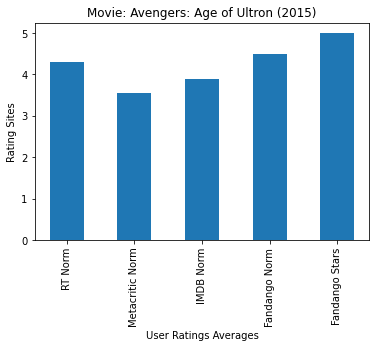

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange

# Convert header names for num_cols to a list
num_cols = norm_reviews.iloc[0][1:].index.tolist()

movie_title = norm_reviews['FILM'].iloc[0]

# Values from first row in num_cols
bar_heights = norm_reviews[num_cols].iloc[0].values

# fix bar column titles for readability
num_cols_name_fix = ['RT Norm','Metacritic Norm','IMDB Norm', 'Fandango Norm','Fandango Stars']

bar_positions = arange(len(num_cols)) + 1
tick_positions = range(1,6)
fig, ax = plt.subplots()

# Create vertical bar chart
ax.bar(bar_positions, bar_heights, width=0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols_name_fix, rotation=90)

plt.xlabel('Movie Rating Sites')
plt.ylabel('Ratings')

plt.ylabel('Rating Sites')
plt.xlabel('User Ratings Averages')
ax.set_title(f"Movie: {movie_title}")

plt.show()

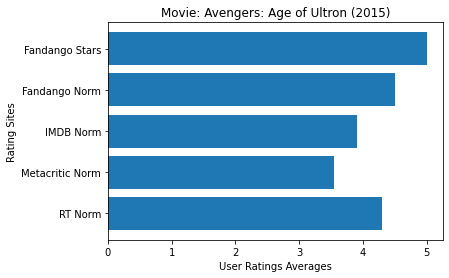

In [ ]:
# Convert chart to horizontal bars for readability of bar titles
fig, ax = plt.subplots()

ax.barh(bar_positions, bar_heights)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols_name_fix)

plt.ylabel('Rating Sites')
plt.xlabel('User Ratings Averages')
ax.set_title(f"Movie: {movie_title}")

plt.show()

### __Fandango and Rotten Tomatoes__

Fandango and Rotten Tomatoes have similiar user ratings for the movie: _Avengers: Age of Ultron (2015)_.


In [ ]:
# User ratings for Avengers: Age of Ultron (2015)
norm_reviews[['Fandango_Ratingvalue','RT_user_norm']].iloc[0]

Fandango_Ratingvalue    4.5
RT_user_norm            4.3
Name: 0, dtype: float64

### __Compare Fandango and Rotten Tomatoes Columns__

Let's take a closer look at the data from these to columns and see is there are other similarities.

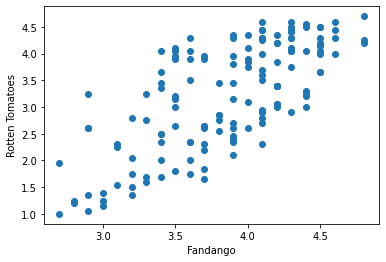

In [ ]:
# Compare Fandango_Ratingvalue and RT_user_norm columns

import numpy 
fig,ax = plt.subplots()

x_axis = norm_reviews['Fandango_Ratingvalue']
y_axis = norm_reviews['RT_user_norm']
ax.scatter(x_axis,y_axis)

# Rename columns for readability
plt.xlabel("Fandango")
plt.ylabel("Rotten Tomatoes")

plt.show()

In [ ]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()
freq_counts

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [ ]:
#Compare Top 5 count_values for all review sites

# remove 'FILM' from df
rating_sites = reviews[['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']]

for col in rating_sites.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(rating_sites[col].value_counts().head(5))

----------------------------------------RT_user_norm---------------------------------------- - 

4.30    8
4.05    7
3.40    5
2.60    5
2.35    4
Name: RT_user_norm, dtype: int64

----------------------------------------Metacritic_user_nom---------------------------------------- - 

3.50    8
3.95    8
3.75    7
3.20    6
3.40    6
Name: Metacritic_user_nom, dtype: int64

----------------------------------------IMDB_norm---------------------------------------- - 

3.60    10
3.30     9
3.15     9
3.90     9
3.70     8
Name: IMDB_norm, dtype: int64

----------------------------------------Fandango_Ratingvalue---------------------------------------- - 

4.1    16
4.2    12
3.9    12
4.3    11
3.7     9
Name: Fandango_Ratingvalue, dtype: int64

----------------------------------------Fandango_Stars---------------------------------------- - 

4.5    55
4.0    41
3.5    27
3.0    12
5.0    11
Name: Fandango_Stars, dtype: int64

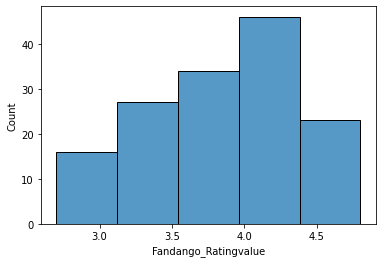

In [ ]:
# histogram with seaborn

import seaborn as sns

sns.histplot(data=norm_reviews, x='Fandango_Ratingvalue',bins=5)


